Задача:Команда ux-дизайнеров работает над улучшением рекламного объявления.
Текущая конверсия составляет в среднем в течении года 30%, но будет отлично, если данный коэффициент повысится до 40.
То есть новый дизайн объявления будет успешным, если оно повысит коэф-т конверсии до 40%.


Гипотеза: 
    1. Принимаем за Н0, что коэф. конверсии старого и нового образца равны между собой, - p(a)=p(b) 
    2. Если Н0 не верна то обращаемся к альтернативной гипотезе Н1, - p(a) ≠ p(b)
    3. Гипотезу Н0 отвергаем при пороге α=0,05 (уровень доверия 95%)

Представленные данные:
    - А/В - старый и новый вариант обьявления (контрольная и тестовая группа)
    - 0/1 - наличие или отсутствие отклика (бинарные данные)

In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('ad.csv')
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


Для предварительного анализа необходимо отобразить в сводной таблице:
    - уровень конверсии
    - стандартное отклонение
    - стандартную ошибку

In [17]:
import numpy as np

In [18]:
summary=pd.crosstab(df.ad_id, df.action, margins=True, margins_name='Total')
summary['conv_p']=df.pivot_table(values='action', index='ad_id')

In [19]:
summary['std_p']=df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: np.std(x, ddof=0)). round(2)

In [20]:
import scipy.stats as stats

In [21]:
summary['se_p']=df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: stats.sem(x, ddof=0)).round(4)
summary

action,0,1,Total,conv_p,std_p,se_p
ad_id,,,,,,
A,696,304,1000,0.304,0.46,0.0145
B,628,372,1000,0.372,0.48,0.0153
Total,1324,676,2000,NaN,NaN,NaN


Визуализируем полученные результаты 

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0, 0.5, 'Коэф-т конверсии')

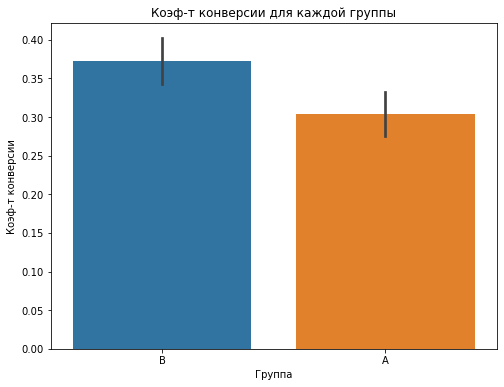

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['ad_id'], y=df['action'])
plt.title('Коэф-т конверсии для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Коэф-т конверсии')

Исходя из полученных даннный можно предположить, что дизайн "В" лучьше чем дизайн "А".
Для проверки предположения необходимо провести статистическую проверку используя Z -test
(известно стандартное отклонение по группам и  N>30 ).

In [29]:
import scipy.stats as stats

In [30]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [25]:
control_group = df[df['ad_id']=='A']['action']
test_group = df[df['ad_id']=='B']['action']

In [26]:
nobs = [control_group.count(), test_group.count()] 
nobs

[1000, 1000]

In [27]:
successes = [control_group.sum(), test_group.sum()]
successes

[304, 372]

In [31]:
z_stat, pval = proportions_ztest(successes, nobs)
print('z-statistic:', z_stat.round(3))
print('p-value:', pval.round(3))

z-statistic: -3.214
p-value: 0.001


In [34]:
alpha=0.05

In [35]:
print(pval<alpha)

True


По резултатам Z теста отклоняем Н0 и принимаем альтернативную.
Эфективность нового дизайна выше чем старого.
Для определения возможного уровня повышения конверсии при использовании дизайна "В" расчитаем доверительные интервалы для каждой из групп.

In [38]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs = nobs, alpha = 0.05)
print('Доверительный интервал для контрольной группы А:', lower_con, ' - ', upper_con)
print('Доверительный интервал для тестовой группы В:', lower_test, ' - ', upper_test)

Доверительный интервал для контрольной группы А: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для тестовой группы В: 0.3420429266473629  -  0.4019570733526371


Вывод: Новый дизайн объявления можно признать успешным, так как он повышает коэф-т конверсии до 40%